# **PRACTICAL 2**

# **IMPORT** **ALL** **THE** **NECESSARY** **Libraries**

In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from ucimlrepo import fetch_ucirepo
from sklearn.neighbors import KNeighborsClassifier

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")


# **INSTALL THE UCI ML REPO**

In [65]:
pip install ucimlrepo

### **1. NOW FETCH THE DATASET**

In [66]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)



# **EXPLORATORY DATA ANALYSIS**

### **2.1. DATASET OVERVIEW**

In [67]:
# Create a copy of the data for EDA
df = X.copy()
df['target'] = y

# 2.1 Dataset Overview
print("=== DATASET OVERVIEW ===")
print("Shape:", df.shape)
print("\nFeature names:", list(X.columns))
print("\nTarget variable: class")
print("\nFirst 5 rows:")
print(df.head())


=== DATASET OVERVIEW ===
Shape: (400, 25)

Feature names: ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

Target variable: class

First 5 rows:
        age        bp  sg  al  su  rbc  pc  pcc  ba       bgr  ...       pcv  \
0 -0.210031  0.254214   3   1   0    1   1    0   0 -0.320122  ...  0.603224   
1 -2.627234 -1.972476   3   4   0    1   1    0   0 -0.320122  ... -0.132789   
2  0.615355  0.254214   1   2   3    1   1    0   0  3.697618  ... -0.991470   
3 -0.210031 -0.488016   0   4   0    1   0    1   0 -0.373337  ... -0.868801   
4 -0.033163  0.254214   1   2   0    1   1    0   0 -0.519679  ... -0.500795   

       wbcc      rbcc  htn  dm  cad  appet  pe  ane  target  
0 -0.197314  0.550044    1   2    0      0   0    0       0  
1 -0.909782  0.074073    0   1    0      0   0    0       0  
2 -0.316059  0.074073    0   2    0      1   0    1       0  
3 -0.63271

### **2.2. ADDRESS THE MISSING VALUES**

In [68]:
# 2.2 Missing Values Analysis
print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])




=== MISSING VALUES ===
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


### **2.3. FEATURE TYPES**

In [69]:
# 2.3 Feature Types
print("\n=== FEATURE TYPES ===")
# Identify categorical and numerical features
categorical_features = []
numerical_features = []

for col in X.columns:
    if df[col].dtype == 'object' or df[col].nunique() < 10:
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)



=== FEATURE TYPES ===
Categorical features: ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Numerical features: ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']


### **2.4 CLASS DISTRIBUTION**


=== CLASS DISTRIBUTION ===
target
0    248
2    150
1      2
Name: count, dtype: int64


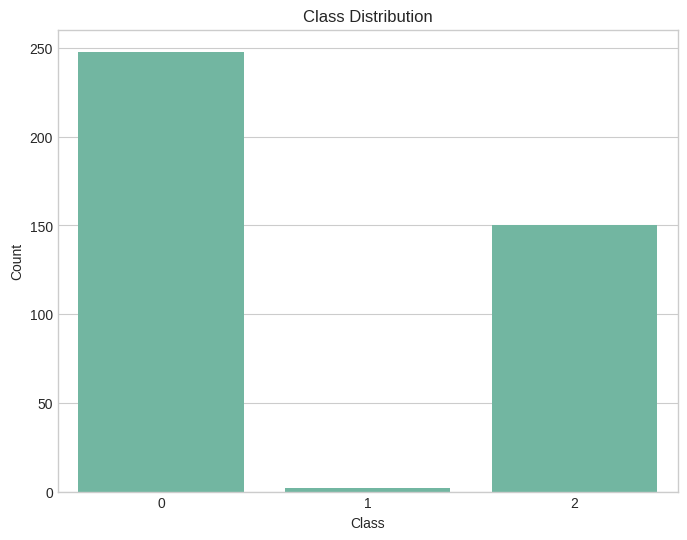

In [70]:
# 2.4 Class Distribution
print("\n=== CLASS DISTRIBUTION ===")
class_dist = df['target'].value_counts()
print(class_dist)
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### **2.5 DESCRIPTIVE STATISTICS**

In [71]:
# 2.5 Descriptive Statistics
print("\n=== DESCRIPTIVE STATISTICS ===")
print(df[numerical_features].describe())



=== DESCRIPTIVE STATISTICS ===
              age          bp         bgr          bu            sc  \
count  400.000000  400.000000  400.000000  400.000000  4.000000e+02   
mean     0.000000    0.000000    0.000000    0.000000  1.776357e-17   
std      1.001252    1.001252    1.001252    1.001252  1.001252e+00   
min     -2.922015   -1.972476   -1.637196   -1.118774 -4.619702e-01   
25%     -0.563768   -0.488016   -0.586198   -0.601883 -3.730314e-01   
50%      0.202662    0.254214   -0.320122   -0.297830 -3.018804e-01   
75%      0.733267    0.254214    0.065687    0.102506 -4.840492e-02   
max      2.266128    7.676514    4.588971    6.776474  1.298557e+01   

                sod           pot        hemo         pcv        wbcc  \
count  4.000000e+02  4.000000e+02  400.000000  400.000000  400.000000   
mean  -3.552714e-17 -4.440892e-18    0.000000    0.000000    0.000000   
std    1.001252e+00  1.001252e+00    1.001252    1.001252    1.001252   
min   -1.447895e+01 -7.371811e-01   

### **2.6 VIZUALISATIONS**

**HISTOGRAMS**


=== VISUALIZATIONS ===


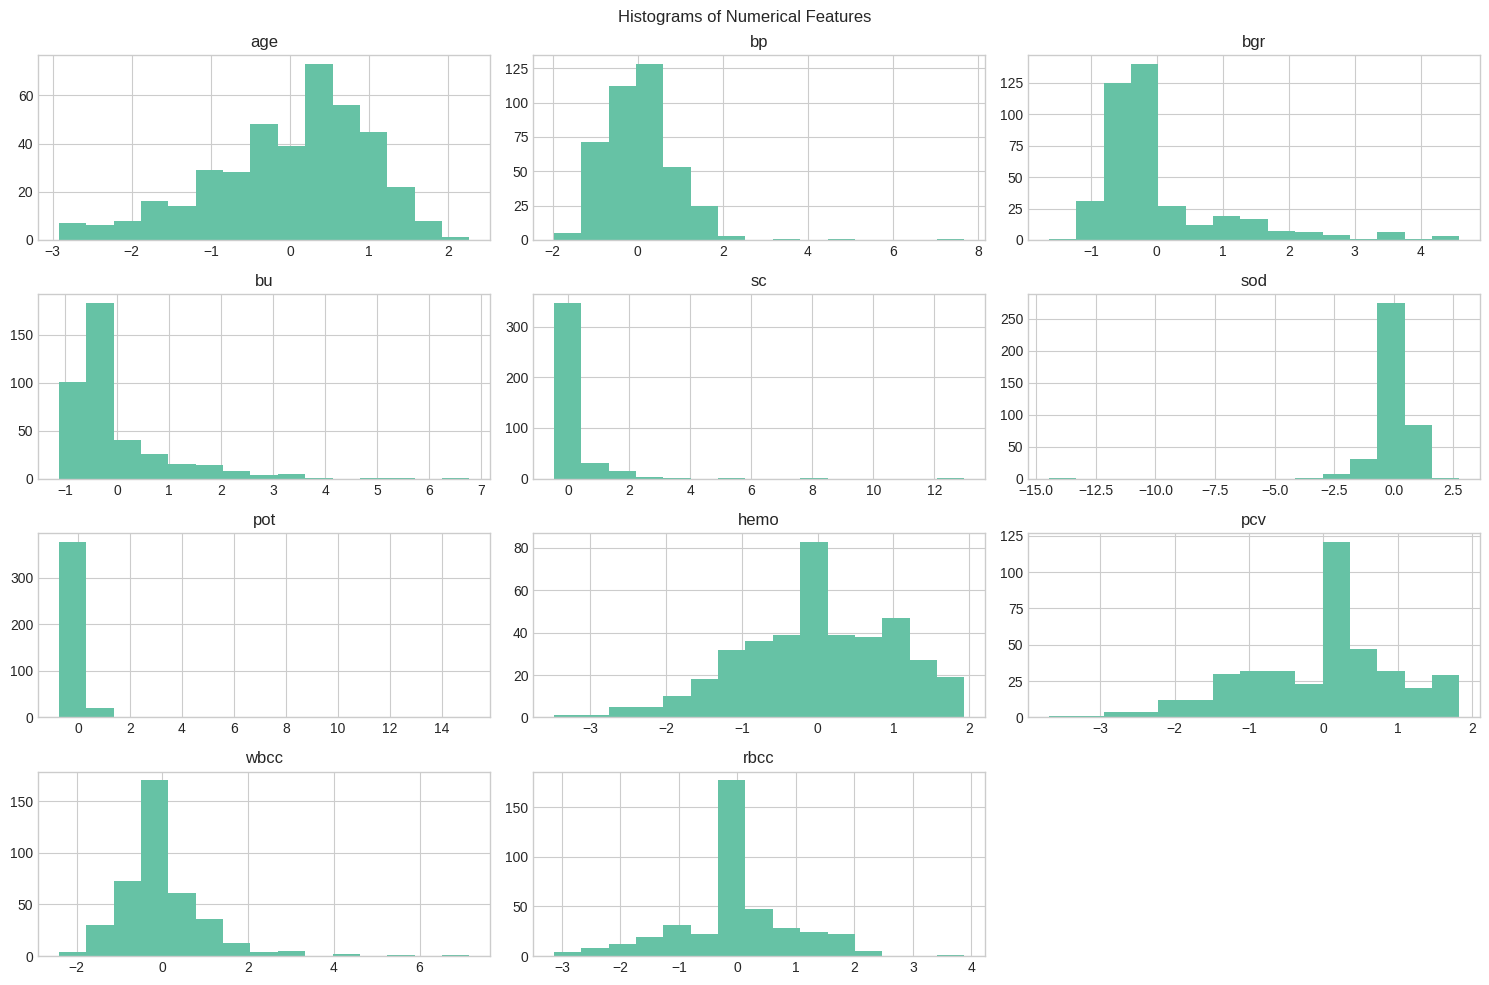

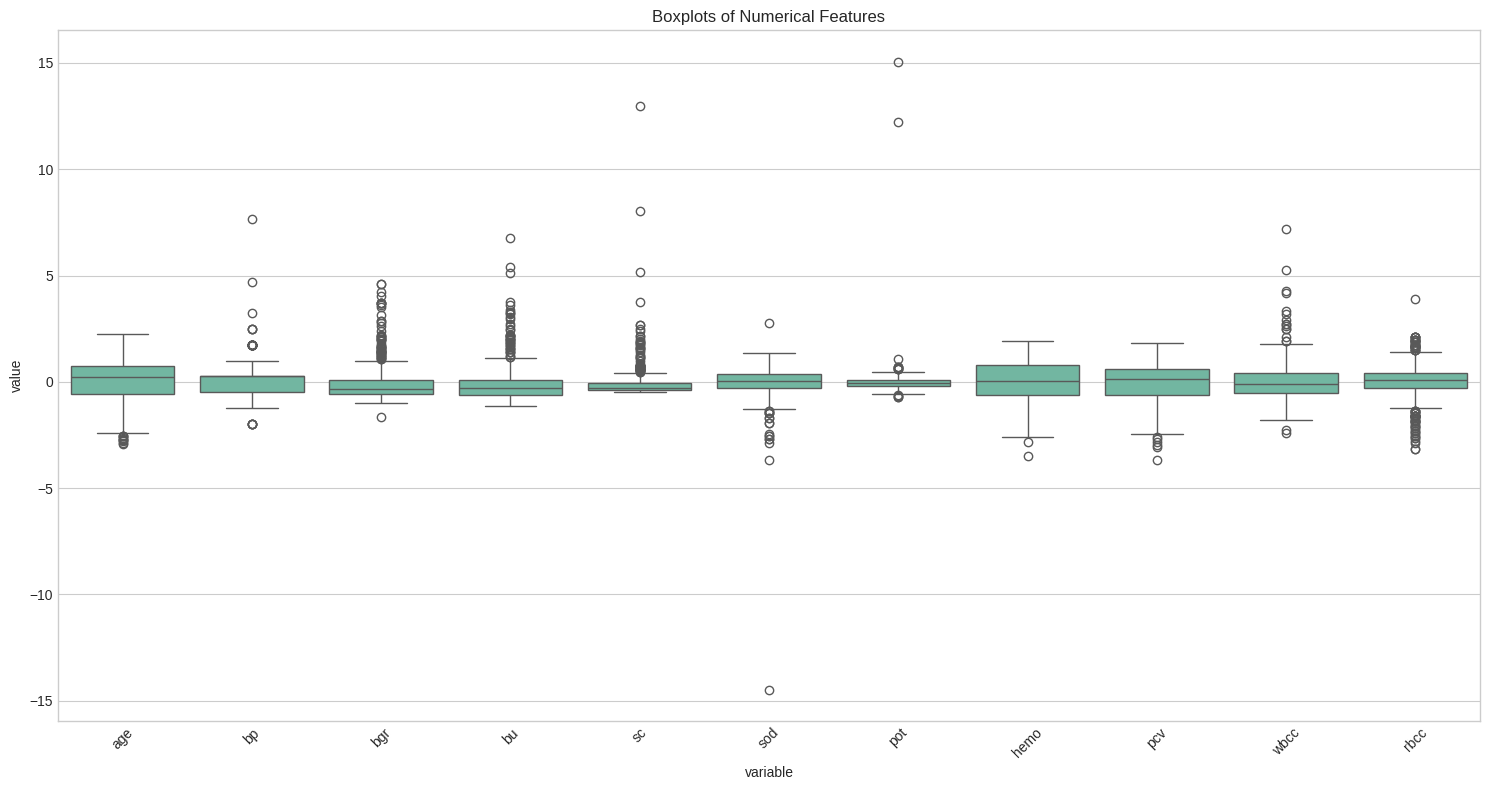

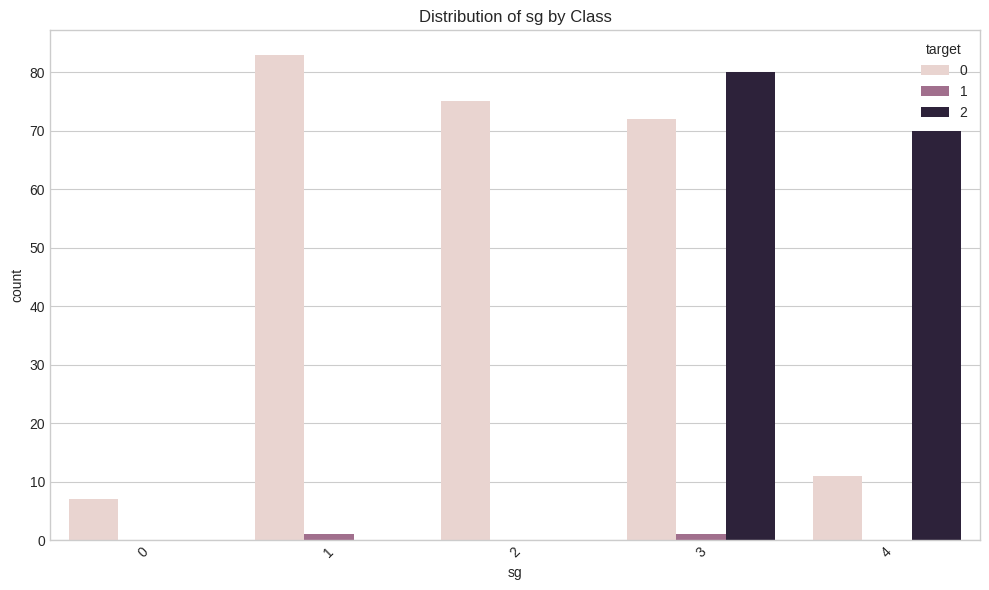

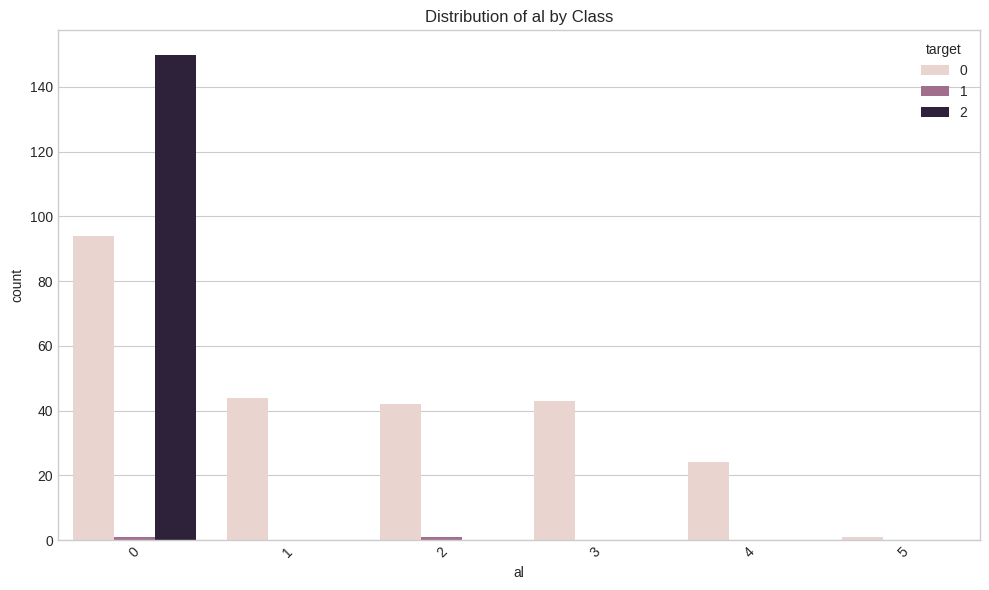

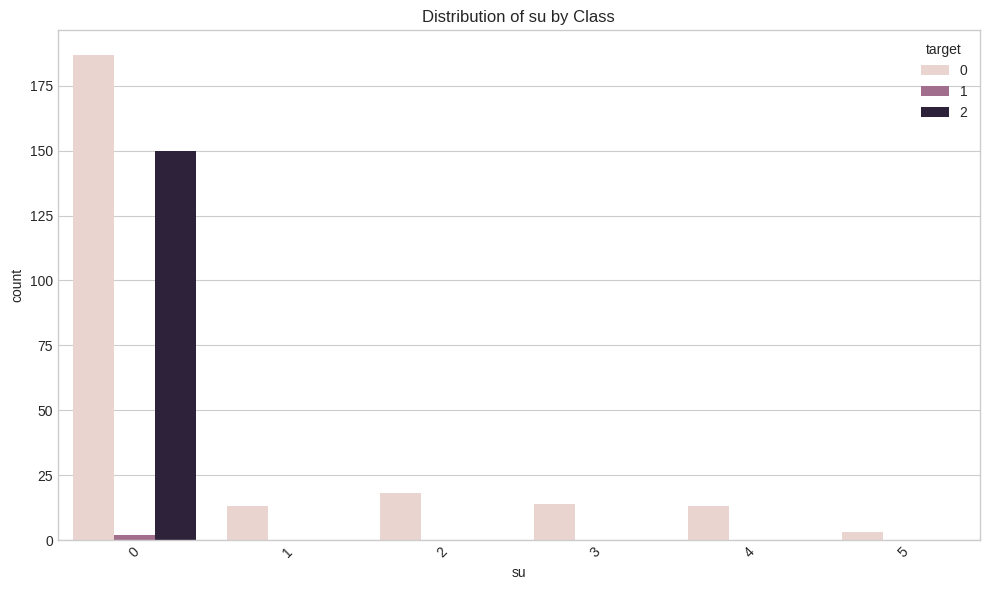

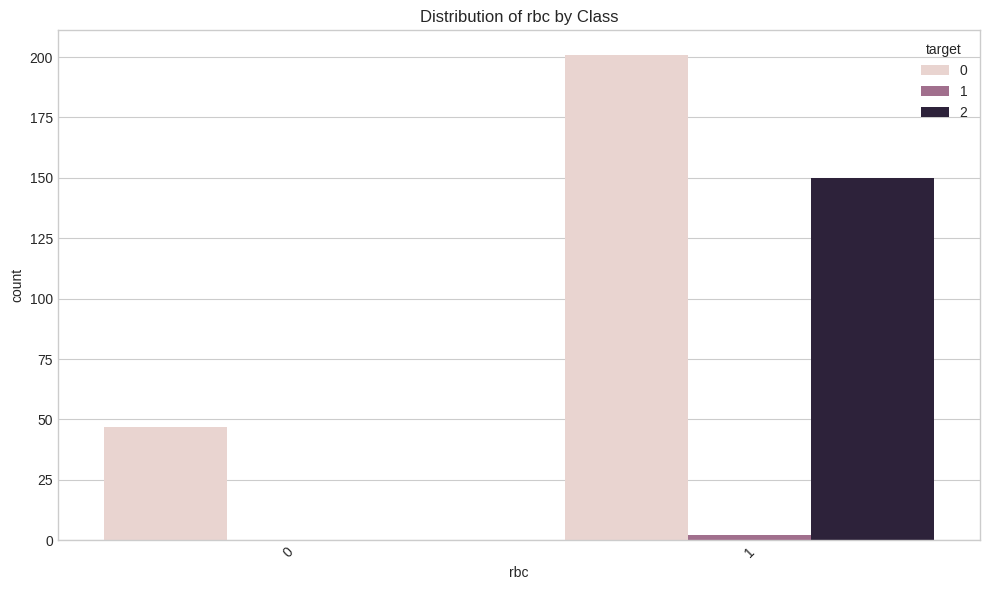

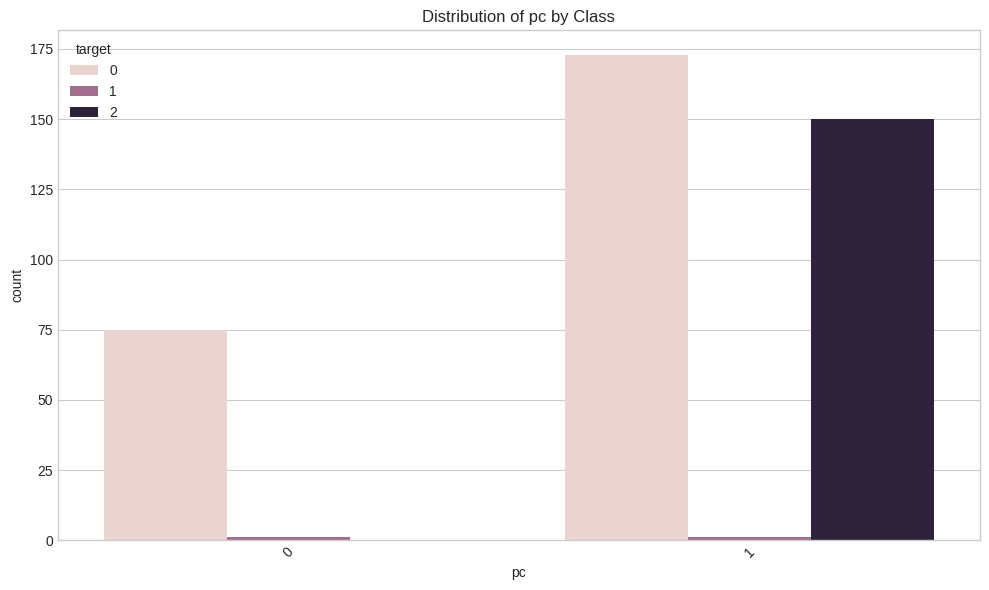

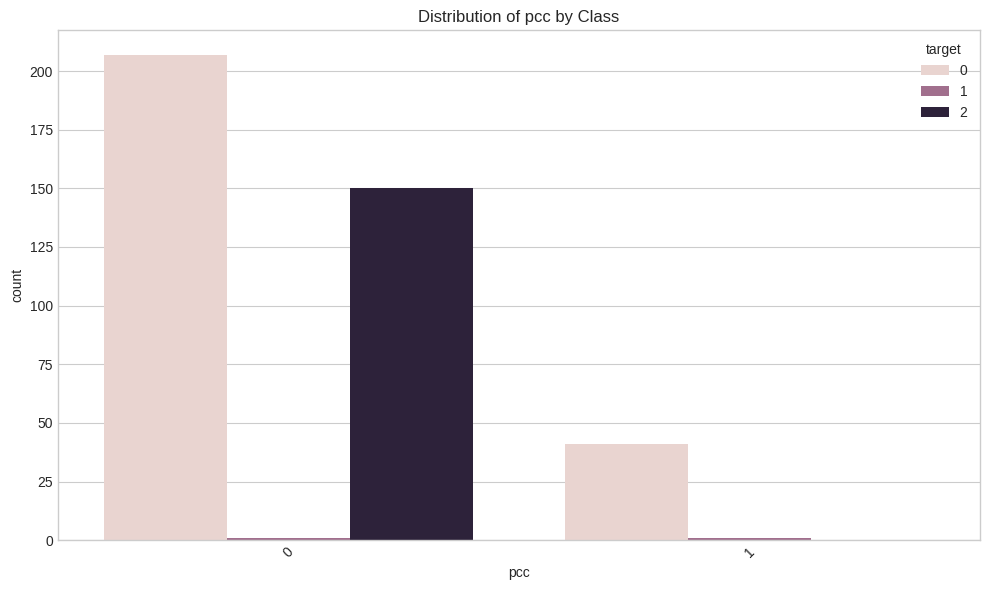

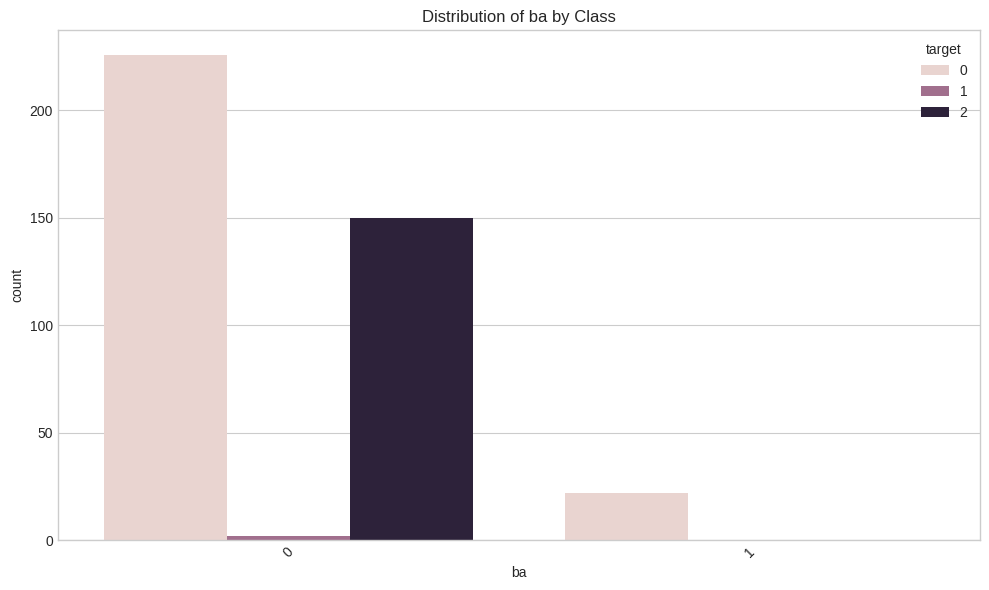

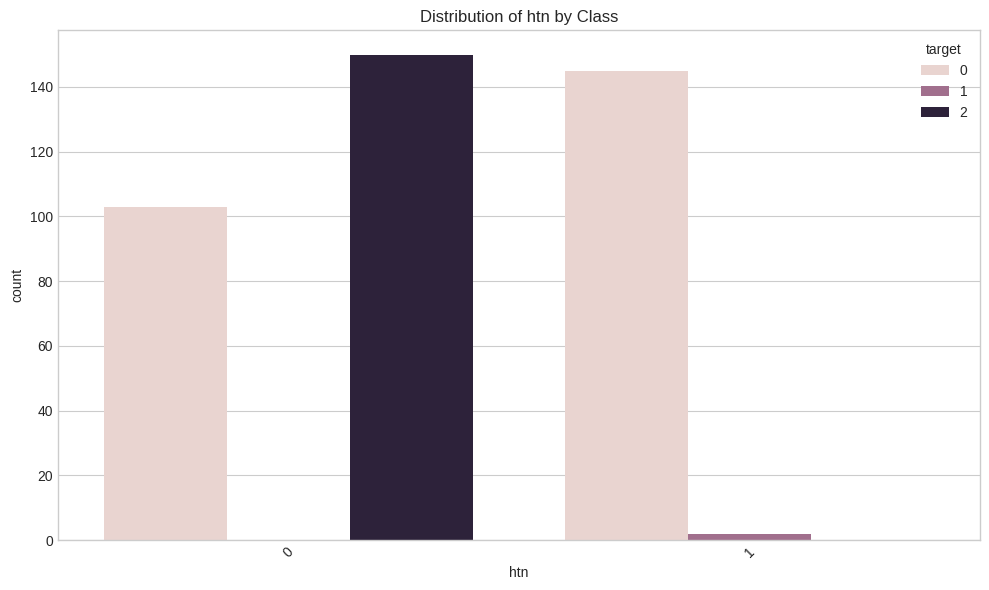

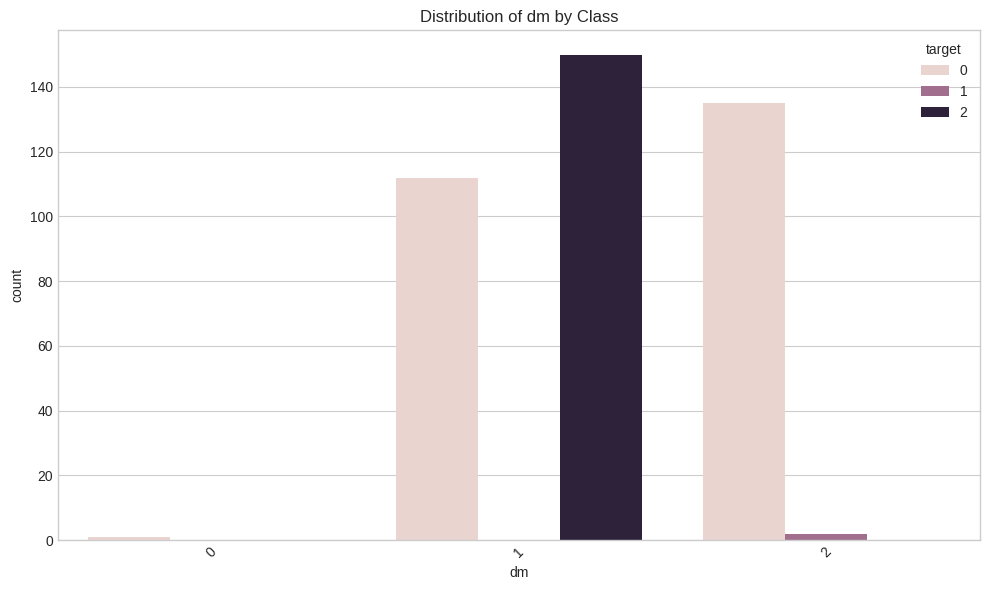

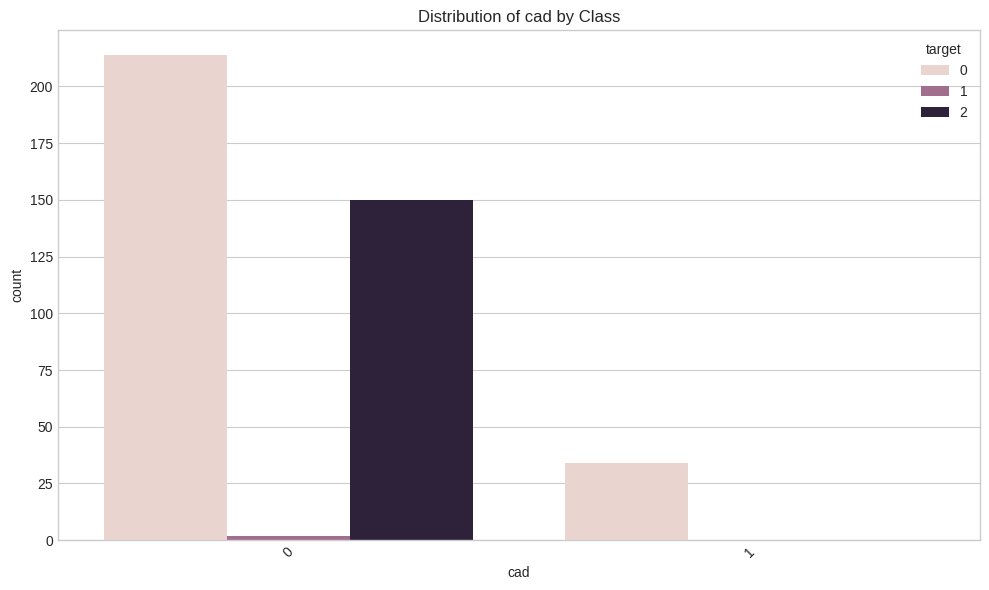

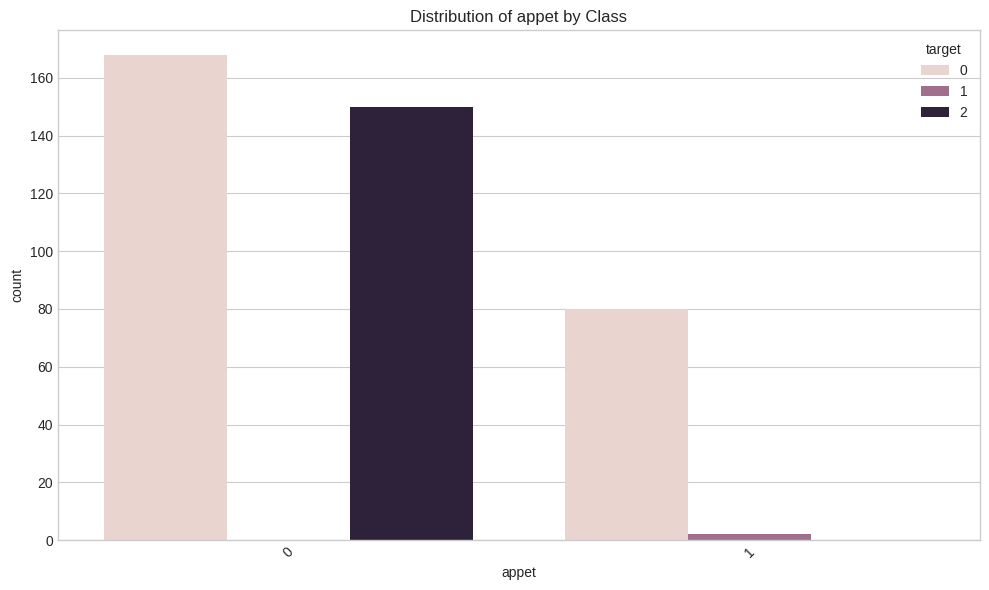

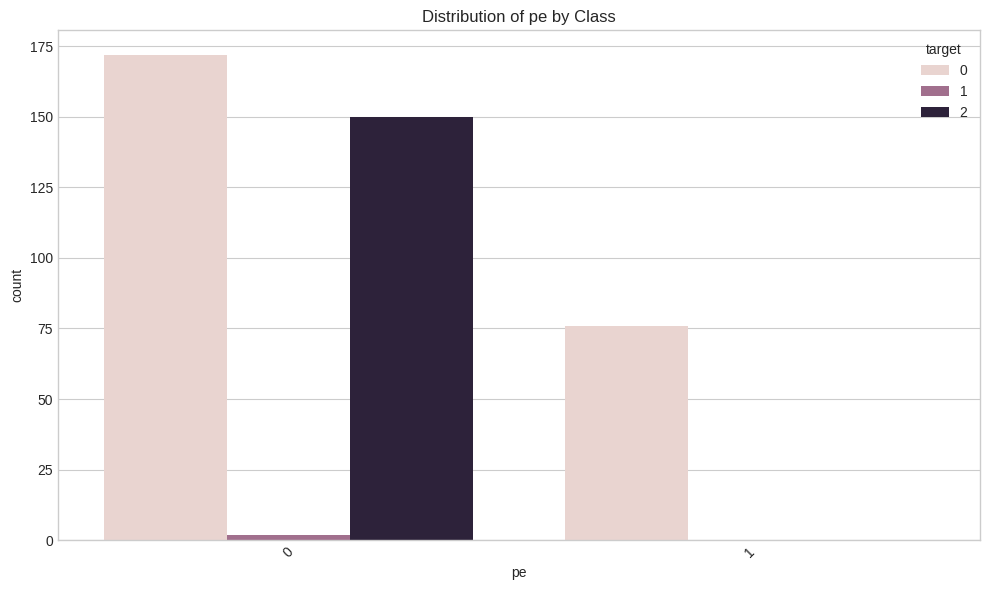

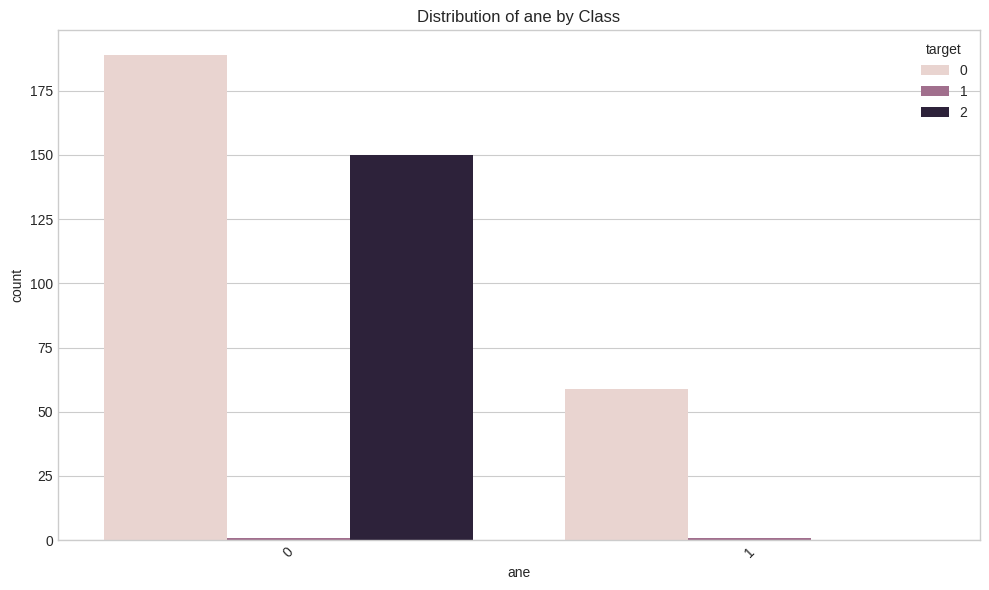

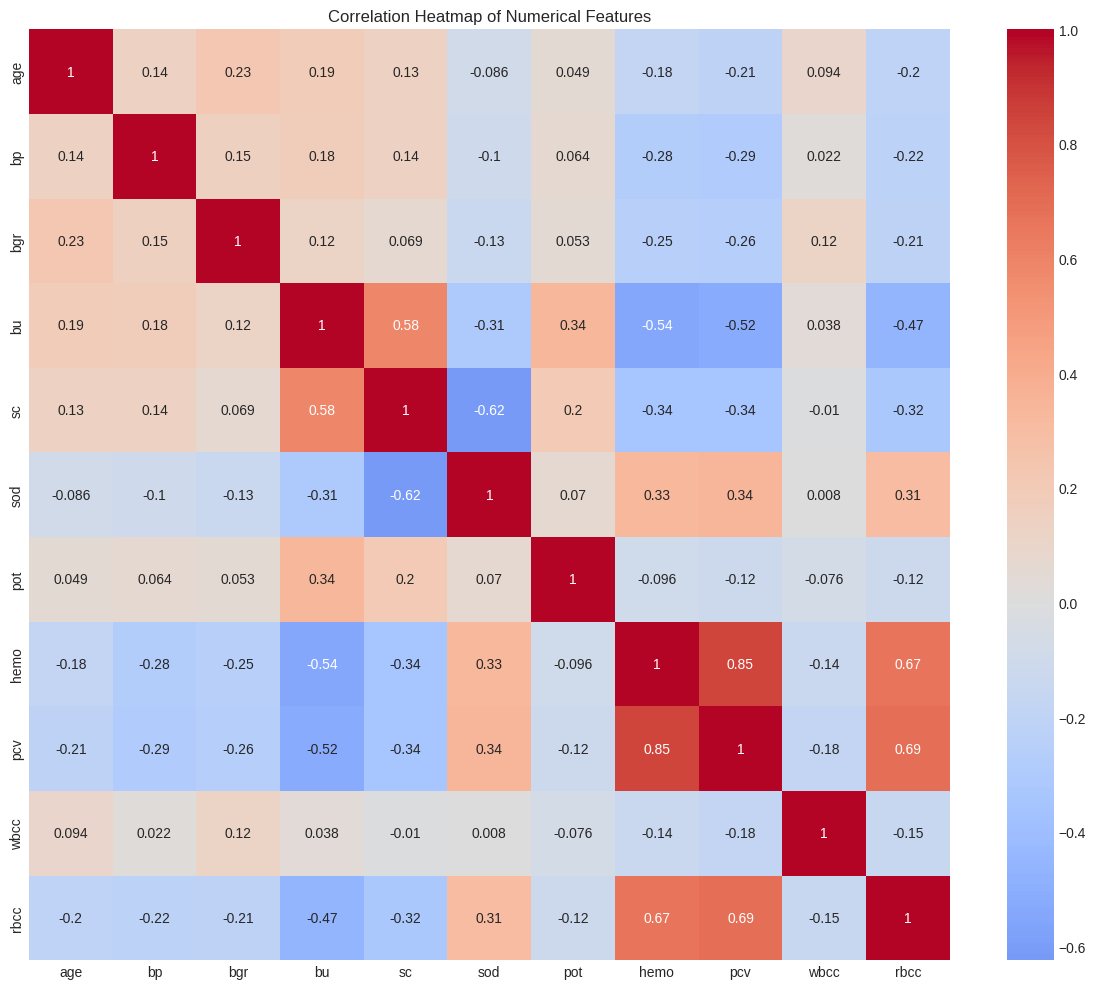




=== EDA INSIGHTS ===
1. The dataset has significant missing values (3-28% across features)
2. There's a class imbalance with more chronic kidney disease cases
3. Several features show strong correlations (e.g., sg and al, hemo and pcv)


In [72]:
# 2.6 Visualizations
print("\n=== VISUALIZATIONS ===")

# Histograms for numerical features
df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()
print('\n')


**BOXPLOTS**

In [ ]:
# Boxplots for numerical features
plt.figure(figsize=(15, 8))
df_melted = pd.melt(df[numerical_features])
sns.boxplot(x='variable', y='value', data=df_melted)
plt.xticks(rotation=45)
plt.title('Boxplots of Numerical Features')
plt.tight_layout()
plt.show()
print('\n')


**BAR CHARTS**

In [ ]:
# Bar charts for categorical features
for col in categorical_features:
    if col != 'target':  # Exclude target variable
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df, hue='target')
        plt.title(f'Distribution of {col} by Class')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
print('\n')


**`CORRELATION HEATMAP`**

In [ ]:
# Correlation heatmap (for numerical features only)
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()
print('\n')


**EDA INSIGHTS**

In [ ]:
# EDA Insights
print("\n=== EDA INSIGHTS ===")
print("1. The dataset has significant missing values (3-28% across features)")
print("2. There's a class imbalance with more chronic kidney disease cases")
print("3. Several features show strong correlations (e.g., sg and al, hemo and pcv)")


# **3. DATA PREPROCESSING**

### **`3.1. HANDLE MISSING VALUES`**

In [73]:
# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Handle missing values
# For numerical features: impute with median
# For categorical features: impute with mode

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X[numerical_features] = num_imputer.fit_transform(X[numerical_features])
X[categorical_features] = cat_imputer.fit_transform(X[categorical_features])


Training set shape: (320, 24)
Test set shape: (80, 24)


### **3.2. ENCODE CATEGORICAL VARIABLES**

In [77]:
# Encode categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)


### **3.3. NORMALIZE/STANDARDIZE FEATURES**



In [ ]:
# Normalize/standardize features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


### **3.4. SPLIT DATASET INTO TRAIN AND TEST**





In [ ]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


# **4. MODELLING**

### **4.1. INITIALIZE MODELS**

In [74]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and predict with each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }



### **4.2. TRAIN THE MODEL**

In [ ]:
# Train each model
print("=== TRAINING MODELS ===")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
print("All models trained successfully!\n")


### **`4.3. PREDICT FOR EACH MODEL`**

In [ ]:
# Make predictions with each model
print("=== MAKING PREDICTIONS ===")
predictions = {}
probabilities = {}
for name, model in models.items():
    print(f"Making predictions with {name}...")
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    predictions[name] = y_pred
    probabilities[name] = y_pred_proba
print("All predictions completed!\n")


**STORE RESULTS**

In [ ]:
# Store results in a structured format
print("=== STORING RESULTS ===")
results = {}
for name in models.keys():
    results[name] = {
        'model': models[name],
        'predictions': predictions[name],
        'probabilities': probabilities[name]
    }
    print(f"Stored results for {name}")

print("\n=== RESULTS STORAGE COMPLETE ===")
print(f"Results stored for {len(results)} models")


# **5. MODEL EVALUATION**

**Performance metrics**

Unique labels in y_test: [0 2]
Number of unique classes: 2
This is a binary classification problem with non-standard labels
Positive class (CKD) is encoded as: 0

=== Logistic Regression - Confusion Matrix ===


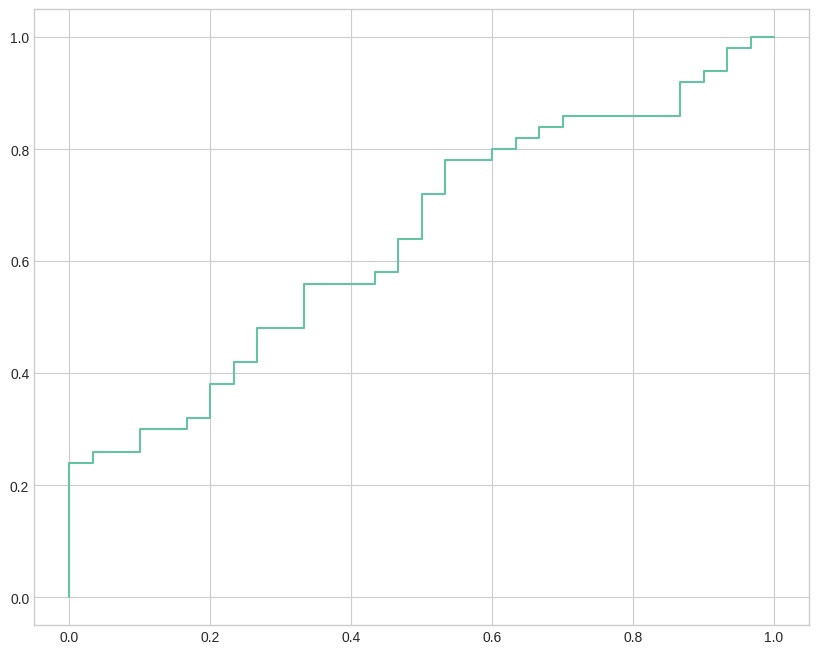

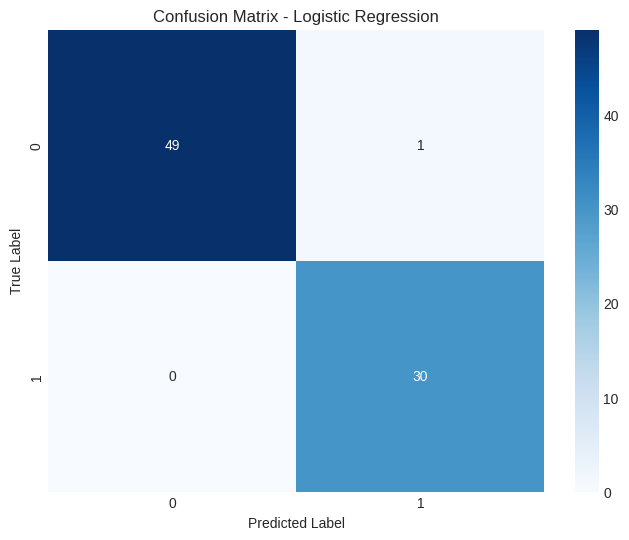


=== Decision Tree - Confusion Matrix ===


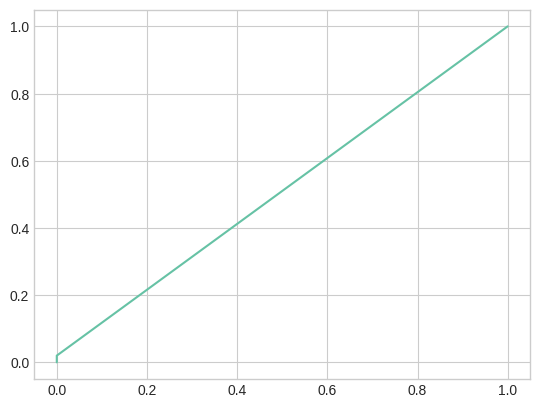

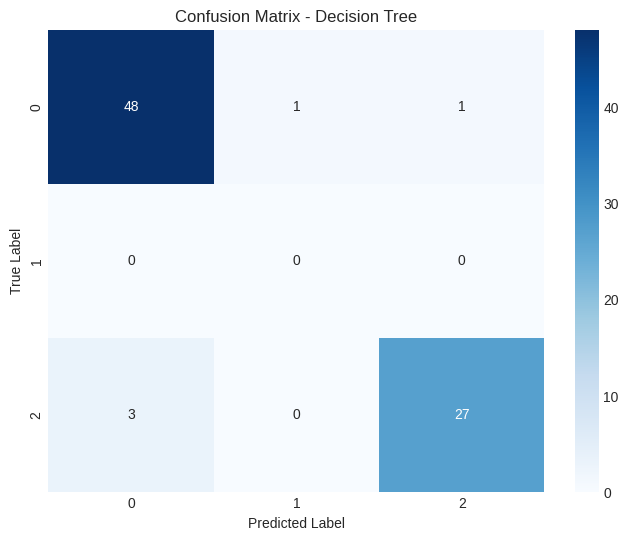


=== K-Nearest Neighbors - Confusion Matrix ===


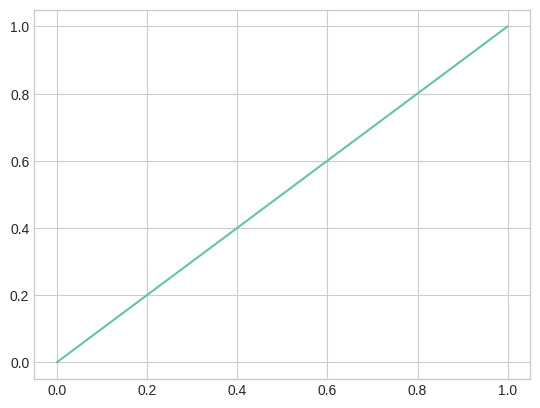

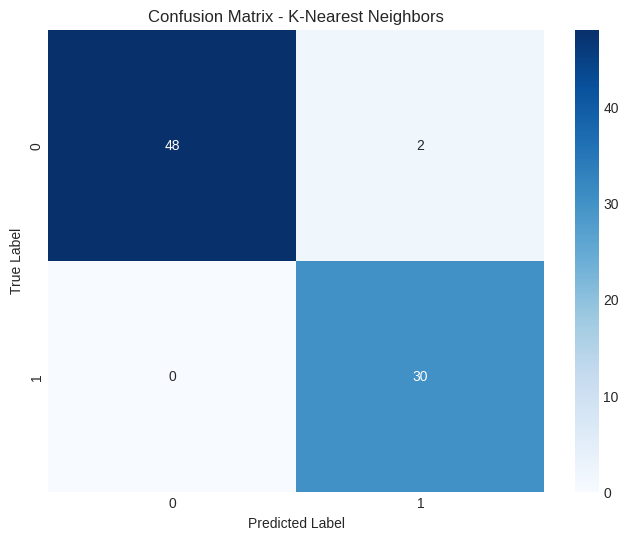

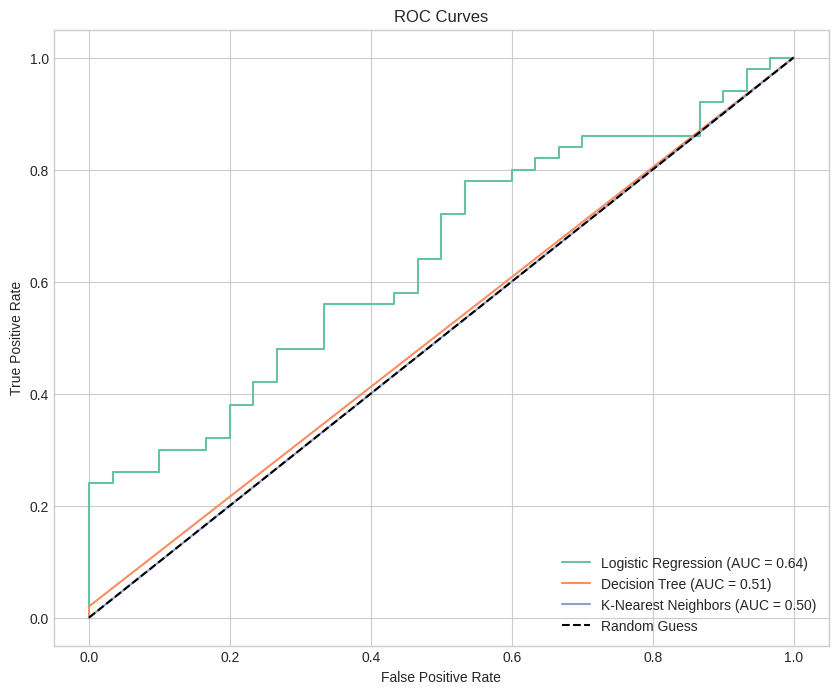


=== MODEL EVALUATION METRICS ===
                 Model  Accuracy  Precision  Recall  F1-Score       AUC
0  Logistic Regression    0.9875   0.987903  0.9875  0.987539  0.640667
1        Decision Tree    0.9375   0.949842  0.9375  0.943197  0.510000
2  K-Nearest Neighbors    0.9750   0.976562  0.9750  0.975148  0.500000

=== DETAILED CLASSIFICATION REPORTS ===

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           2       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        50
           1       0.00      0.00      0.00         0
           2       0.96      0.90      0.93        30

    accura

In [75]:
# Create an empty list to store evaluation results
evaluation_data = []

# Check what our unique labels are
print(f"Unique labels in y_test: {np.unique(y_test)}")
print(f"Number of unique classes: {len(np.unique(y_test))}")

# Even though we have 2 classes, sklearn treats [0, 2] as multiclass
# So we'll use weighted averaging for all metrics
n_classes = len(np.unique(y_test))
is_binary = n_classes == 2

if is_binary:
    print("This is a binary classification problem with non-standard labels")
    # Determine which label is the positive class (CKD)
    class_counts = np.bincount(y_test)
    positive_class = np.argmax(class_counts)  # The class with most samples
    print(f"Positive class (CKD) is encoded as: {positive_class}")
else:
    print(f"This is a multiclass classification problem with {n_classes} classes")

# Plot ROC curves (only for binary classification)
if is_binary:
    plt.figure(figsize=(10, 8))

for name, result in results.items():
    # Calculate metrics with weighted averaging (works for both binary and multiclass)
    accuracy = accuracy_score(y_test, result['predictions'])
    precision = precision_score(y_test, result['predictions'], average='weighted', zero_division=0)
    recall = recall_score(y_test, result['predictions'], average='weighted', zero_division=0)
    f1 = f1_score(y_test, result['predictions'], average='weighted', zero_division=0)

    # Calculate AUC if probabilities are available (only for binary)
    auc_score = None
    if result['probabilities'] is not None and is_binary:
        # Handle both 1D and 2D probability arrays
        if result['probabilities'].ndim == 1:
            # 1D array - use as is (probabilities for positive class)
            probas_positive = result['probabilities']
        else:
            # 2D array - get probabilities for positive class
            # Find the index of positive_class in the model's classes_
            positive_idx = np.where(model.classes_ == positive_class)[0][0]
            probas_positive = result['probabilities'][:, positive_idx]

        fpr, tpr, _ = roc_curve(y_test, probas_positive, pos_label=positive_class)
        auc_score = auc(fpr, tpr)
        if is_binary:
            plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

    # Add to evaluation data list
    evaluation_data.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc_score if is_binary else 'N/A'
    })

    # Print confusion matrix
    print(f"\n=== {name} - Confusion Matrix ===")
    cm = confusion_matrix(y_test, result['predictions'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Create DataFrame from the list
evaluation_df = pd.DataFrame(evaluation_data)

# Plot ROC curve (only for binary classification)
if is_binary:
    plt.figure(figsize=(10, 8))
    for name, result in results.items():
        if result['probabilities'] is not None:
            # Handle both 1D and 2D probability arrays
            if result['probabilities'].ndim == 1:
                probas_positive = result['probabilities']
            else:
                positive_idx = np.where(results[name]['model'].classes_ == positive_class)[0][0]
                probas_positive = result['probabilities'][:, positive_idx]

            fpr, tpr, _ = roc_curve(y_test, probas_positive, pos_label=positive_class)
            auc_score = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

# Display evaluation metrics
print("\n=== MODEL EVALUATION METRICS ===")
print(evaluation_df)

# Print classification reports for each model
print("\n=== DETAILED CLASSIFICATION REPORTS ===")
for name, result in results.items():
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, result['predictions'], zero_division=0))